# Оптимизация

Оптимизация функций — это задача нахождения набора входных данных целевой функции (то есть её аргументов), которые приводят к минимуму или максимуму функции. Для настройки гиперпараметров.

Для того чтобы решать задачи оптимизации с помощью Python, можно использовать пакет **SciPy Optimize (scipy.optimize)** библиотеки SciPy. Он позволяет реализовывать все основные методы оптимизации, которые чаще всего используются в прикладных задачах.

# Метод Розенброка
Используется, для задач оптимизации, когда на функции нет ограничений.

Чтобы реализовать метод оптимизации, нужна функция, для которой его будут применять. Мы возьмём самую известную функцию, используемую для таких целей — __функцию Розенброк__

Глобальный минимум  этой функции находится внутри вытянутой плоской долины (отсюда и альтернативное название функции), которая по форме напоминает параболу. Найти долину легко, чего не скажешь о глобальном минимуме для этой функции.

Формула: $$f(x) = \sum_{i=1}^{N-1} \left[ 100 (x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right]$$

In [92]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares

In [93]:
# Функция Розенброка
def func_rosen(x):
    r = np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2, axis=0)
    return r

Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных (тогда у нас будет три измерения, и график будет в 3D). В целом, можно было бы взять и большее количество переменных — несомненный плюс этой функции как раз и состоит в возможности использовать многомерные случаи любых размерностей. Однако случай для двух аргументов будет легко представить визуально.

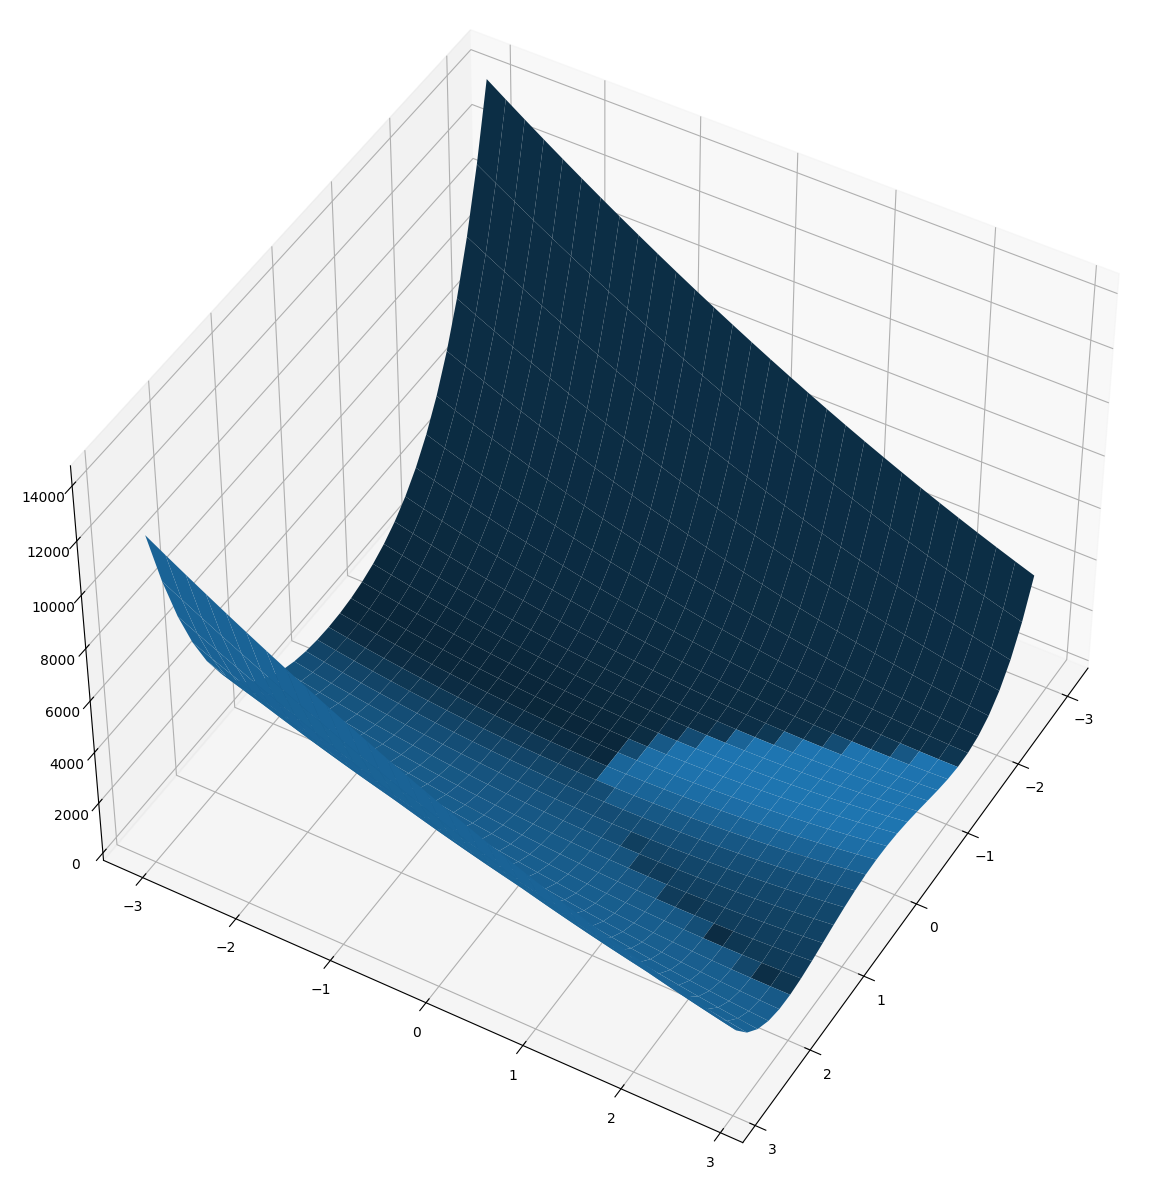

In [94]:
# Создание фигуры для 3D-графика с заданным размером (ширина 25, высота 15)
graph = plt.figure(figsize=[25, 15])

# Добавление трехмерной оси в график
ax = graph.add_subplot(projection='3d')

# Установка угла обзора (угол наклона 45 градусов, угол поворота 30 градусов)
ax.view_init(45, 30)

# Создание массивов значений x1 и x2 в диапазоне от -3 до 3 с шагом 0.2
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-3, 3, 0.2)

# Создание сетки координат (преобразование одномерных массивов в двумерные матрицы)
x1, x2 = np.meshgrid(x1, x2)

# Вычисление значений функции Розенброка для всей сетки точек
y = func_rosen(np.array([x1, x2]))

# Построение поверхности (трехмерного графика)
surf = ax.plot_surface(x1, x2, y)

# Отображение графика
plt.show()

Теперь, когда нам доступно визуальное представление функции, давайте попробуем её оптимизировать. Начнём с простых методов.

In [95]:
# Исходные точки для оптимизации (начальное приближение)
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])

# Минимизация функции Розенброка с использованием метода Пауэлла
result_points = minimize(func_rosen, x1, method='powell')

# Вывод найденных оптимальных значений переменных x
print(result_points.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов. Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [96]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_points = minimize(func_rosen, x1, method='nelder-mead')
print(result_points.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


Найденная точка следующая (заметьте, что результаты отличаются от полученных предыдущим методом, но это нормально).

Симплекс-метод является стандартным методом для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

# Практика

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция least_squares (мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений)

В качестве ответа внесите в поля ниже координаты найденной точки в порядке их следования в коде (одно поле — одна координата). Ответ округлите до трёх знаков после точки-разделителя.

In [97]:
# Исходная точка (начальные значения переменных)
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])

# Минимизация функции Розенброка методом наименьших квадратов
result_points = least_squares(func_rosen, x1)

# Вывод округленного результата (оптимальные значения переменных)
print(result_points.x.round(3))

[0.939 0.882 0.776 0.603 0.361]


# Метод Лангранжа

Используется в задачах классификации, когда данные невозможно разделить линейно (классы располагаются в разных местах):

<img src='Images/ml_9.png'>

Примечание: Если для исследуемых данных не существует прямой или плоскости, с помощью которых можно поделить выборку на два класса, хорошим методом для решения задачи считается метод опорных векторов (SVM). Алгоритм SVM подбирает гиперплоскость таким образом, чтобы выполнялось два условия:

- минимальная ошибка разделения на классы;
- максимально возможное расстояние от разделяющей гиперплоскости до ближайшей точки.

<img src='Images/ml_10.png'>

Кроме того, когда на функцию которую мы хотим оптимизировать наложены ограничения ввиде выражения. Таким образом мы приходим к задачи условной оптимизации — это задача минимизации или максимизации функции при наличии ограничений на допустимые значения переменных.

Например у нас есть функция: $f(x, y) = 2x + y$ при условии (ограничении), что x^2 + y^2 = 1.

Метод Лагранжа вводит новую переменную - лямбда (лагранжиан) в наше выражение ($\lambda$).

In [98]:
from sympy import symbols, diff, solve

# Определяем переменные
x, y, lambda_ = symbols('x y lambda')

# Определяем функцию, которую оптимизируем
f = 2 * x + y

# Ограничение (равенство)
g = x**2 + y**2 - 1

# Строим лагранжиан
L = f + lambda_ * g

# Вычисляем частные производные
Lx = diff(L, x) # dL/dx
Ly = diff(L, y) # dL/dy
Llambda = diff(L, lambda_) # dL/dlambda

# Промежуточные ответы по уравнениям
print(Lx)
print(Ly)
print(Llambda)
print()

# Решаем систему уравнений
solution = solve([Lx, Ly, Llambda], [x, y, lambda_], dict=True)

# Сортируем решения по значению x (чтобы порядок был фиксирован)
solution_sorted = sorted(solution, key=lambda sol: sol[x])

# Вывод решения
for i, sol in enumerate(solution_sorted):
    print(f"Решение {i+1}:")
    print(f"x = {sol[x]}")
    print(f"y = {sol[y]}")
    print(f"λ = {sol[lambda_]}")
    print("-" * 20)

2*lambda*x + 2
2*lambda*y + 1
x**2 + y**2 - 1

Решение 1:
x = -2*sqrt(5)/5
y = -sqrt(5)/5
λ = sqrt(5)/2
--------------------
Решение 2:
x = 2*sqrt(5)/5
y = sqrt(5)/5
λ = -sqrt(5)/2
--------------------


Если задача с ограничением ввиде неравенства, то мы используем обобщение метода Лагранжа (метод ККТ) - он позволяет учитывать активные ограничения (равенства) и неактивные ограничения (неравенства).

Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить? Хотя бы одна из сторон прямоугольника должна быть не меньше 6.

In [99]:
from sympy import *

# Определяем переменные
x1, x2, lambda_, mu = symbols('x1 x2 lambda mu', real=True, nonnegative=True)

# Уравнения KKT
eq1 = x2 - lambda_ + mu   # dL/dx1 = 0
eq2 = x1 - lambda_        # dL/dx2 = 0
eq3 = 10 - x1 - x2        # Ограничение на периметр
eq4 = mu * (x1 - 6)       # Условие дополняющей нежёсткости

# Решаем систему
solution = solve([eq1, eq2, eq3, eq4], [x1, x2, lambda_, mu], dict=True)

# Выводим решения
for sol in solution:
    print(f"x1 = {sol[x1]}, x2 = {sol[x2]}, λ = {sol[lambda_]}, μ = {sol[mu]}")

x1 = 5, x2 = 5, λ = 5, μ = 0
x1 = 6, x2 = 4, λ = 6, μ = 2


Рассматриваем два случая:

* Если $x1 > 6$, то $mu$ = 0 

* Если $x1 = 6$, то $mu$ может быть больше нуля, и ограничение активно.

Метод ККТ дает правильный ответ x1 = 6, x2 = 4, а площадь Amax = 24 (6 * 4)

Еще пример:
Функция $f(x) = x^2 . + 2xy + y^2$ при ограничениях x + y = 2 (равенство) и 5 <= x <= 8 (неравенство).

In [100]:
from sympy import symbols, solve

# Определяем переменные
x, y, lambda_, mu1, mu2 = symbols('x y lambda mu1 mu2', real=True, nonnegative=True)

# Частные производные (условия KKT)
eq1 = 2*x + 2*y - lambda_ - mu1 + mu2  # dL/dx = 0
eq2 = 2*x + 2*y - lambda_               # dL/dy = 0
eq3 = 2 - x - y                         # Ограничение x + y = 2
eq4 = mu1 * (5 - x)                     # Условие KKT для x >= 5
eq5 = mu2 * (x - 8)                     # Условие KKT для x <= 8

# Решаем систему
solution = solve([eq1, eq2, eq3, eq4, eq5], [x, y, lambda_, mu1, mu2], dict=True)

# Проверяем, что решение найдено и является списком словарей
if isinstance(solution, list):
    if solution:  # Если список не пустой
        for sol in solution:
            print(f"x = {sol.get(x, 'N/A')}, y = {sol.get(y, 'N/A')}, λ = {sol.get(lambda_, 'N/A')}, μ1 = {sol.get(mu1, 'N/A')}, μ2 = {sol.get(mu2, 'N/A')}")
    else:
        print("Решений нет.")
else:
    print("Решение не является списком. Проверьте вывод solve().")

x = 2 - y, y = N/A, λ = 4, μ1 = 0, μ2 = 0


# Градиент и антиградиент

Градиент функции $f$, обозначаемый как $\nabla f$, представляет собой вектор, компоненты которого равны частным производным функции $f$ по всем её аргументам:

$$
\nabla f =
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\vdots
\end{bmatrix}
$$

Таким образом, вы можете найти каждую производную отдельно, соединить все производные вместе и получить градиент.

In [101]:
# Например найдем три производных для функции
x, y, z = symbols('x y z')
f = x - x * y + z**2

fx_prime = diff(f, x).simplify()
print(fx_prime)

fy_prime = diff(f, y).simplify()
print(fy_prime)

fz_prime = diff(f, z).simplify()
print(fz_prime)

1 - y
-x
2*z


Представим функцию в виде холмистой местности. Пусть мы стоим в какой-то точке этой местности (x1, y1, z1). Если мы будем менять своё положение по оси x или по оси y (z) в положительную сторону, то будем подниматься на холм. Но обычно при движении мы меняем координаты положения не по одному измерению, а все разом, то есть меняем положение в пространстве по градиенту. Именно здесь важно осознать самое главное свойство градиента, которое и сделало его столь популярным у аналитиков и специалистов по машинному обучению, — **градиент определяет направление наискорейшего роста функции.**

Если мы заменим все координаты градиента на значения с противоположным знаком, то получим антиградиент, который является **направлением наискорейшего убывания функции.**

Расчитаем градиент для функции $f(x, y) = x^2 + y^2$ в точках M(0,0), N(1, -1) и P(1, 1):

In [102]:
from sympy import *

x, y = symbols('x y')

f = x**2 + y**2

# Градиент по X (производная по x) 
grad_x = diff(f, x).simplify()
print(grad_x)
# Градиент по Y (производная по y) 
grad_y = diff(f, y).simplify()
print(grad_y)

# Наши точки по условию
M = {x: 0, y: 0}
N = {x: 1, y: -1}
P = {x: 1, y: 1}

print()
# Рассчитаем точки 
grad_at_point_m = (grad_x.subs(M), grad_y.subs(M))
print(f"Градиент в точке M: {grad_at_point_m}")

grad_at_point_n = (grad_x.subs(N), grad_y.subs(N))
print(f"Градиент в точке N: {grad_at_point_n}")

grad_at_point_p = (grad_x.subs(P), grad_y.subs(P))
print(f"Градиент в точке P: {grad_at_point_p}")

2*x
2*y

Градиент в точке M: (0, 0)
Градиент в точке N: (2, -2)
Градиент в точке P: (2, 2)


Получаем, что в точке N градиент равен (2, -2), то есть при увеличении x функция будет возрастать, а при увеличении y — убывать. В точке P значение градиента равно (2, 2) — это значит, что в окрестности P сумма квадратов возрастает по обеим переменным. В точке M градиент нулевой, то есть все частные производные равны нулю, а значит возможно, что в этой точке находится экстремум!

## Разница между аналитическим и численным градиентом
Есть два разных способа вычисления градиента:

1. Аналитический градиент (математический) — вычисляется через частные производные.
2. Численный градиент (численное дифференцирование) — вычисляется с помощью разностей между точками.

## Численный градиент (градиент на сетке, через NumPy) с помощью функции gradient()

Используется, когда у нас есть только табличные данные или дискретные точки.

Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной N-мерной сетке с шагом, который можно задать вручную.

Такой градиент немного отличается от того, который рассматривался ранее, поскольку это градиент для численных значений, а не для функций (хотя он обозначается так же и аналогичен по смыслу). Однако он тоже используется в DS, особенно в задачах компьютерного зрения.

Зададим массив, для которого хотим найти градиент, и вычислим его:

In [103]:
import numpy as np

# Определяем массив значений функции f
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)

# Вычисляем численный градиент
grad = np.gradient(f)

# Выводим результаты
print("Градиент массива f:", grad)

Градиент массива f: [ 4.   5.5  8.  11.  12.  11. ]


Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [104]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2:

In [105]:
print((f[2] - f[0])/2) # 5.5
print((f[3] - f[1])/2) # 8.0
print((f[4] - f[2])/2) # 11.0
print((f[5] - f[3])/2) # 12.0

5.5
8.0
11.0
12.0


Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [106]:
np.gradient(f, 2)

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


# Практика

In [107]:
w0, w1 = symbols('w0 w1')

f = (2.1 - w0 - w1)**2 + (2.9 - w0 - 3 * w1)**2 + (4.1 - w0 - 5 * w1)**2

# Градиент по X (производная по x) 
grad_w0 = diff(f, w0).simplify()
print(grad_w0)
# Градиент по Y (производная по y) 
grad_w1 = diff(f, w1).simplify()
print(grad_w1)

# Наши точки по условию
M = {w0: 1.53, w1: 0.50}

print()
# Рассчитаем точки
grad_at_point_m = (grad_w0.subs(M), grad_w1.subs(M))
print(f"Градиент в точке M: {grad_at_point_m}")

6.0*w0 + 18.0*w1 - 18.2
18.0*w0 + 70.0*w1 - 62.6

Градиент в точке M: (-0.0199999999999996, -0.0600000000000023)


C помощью метода ниже, можно рассчитать критическую точку при которой градиент будет = 0. Тот параметр при котором наша функция будет допускать минимальную ошибку. 

In [108]:
from sympy import symbols, diff, Eq, solve

# Определяем переменные
w0, w1 = symbols('w0 w1')

# Определяем функцию
f = f = (2.1 - w0 - w1)**2 + (2.9 - w0 - 3 * w1)**2 + (4.1 - w0 - 5 * w1)**2

# Градиент по X (производная по x) 
grad_w0 = diff(f, w0).simplify()
print(grad_w0)
# Градиент по Y (производная по y) 
grad_w1 = diff(f, w1).simplify()
print(grad_w1)

# Формируем систему уравнений
eq1 = Eq(grad_w0, 0)
eq2 = Eq(grad_w1, 0)

# Решаем систему
solution = solve([eq1, eq2], (w0, w1))

print("Решение системы уравнений:", solution)

6.0*w0 + 18.0*w1 - 18.2
18.0*w0 + 70.0*w1 - 62.6
Решение системы уравнений: {w0: 1.53333333333333, w1: 0.500000000000000}


Вычислите градиент массива f, увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов f (порядок элементов начинается с 0).

In [109]:
# Одномерный массив
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

grad_f = np.gradient(f, 7)
print(grad_f[7])

1.4285714285714286


# Градиентный спуск

Рассмотрим визуализацию процесса поиска минимума функции с помощью алгоритма градиентного спуска.

Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [110]:
# Определяем квадратичную функцию двух переменных f(x, y) = a*x^2 + b*y^2
def func_1(x, y, a=1, b=1):
    """Вычисляет значение функции f(x, y) = a * x^2 + b * y^2."""
    return a * (x ** 2) + b * (y ** 2)

# Определяем квадратичную функцию двух переменных f(x) = x^2 * cos(x) - x/(10)
def func_2(x, y):
    """Вычисляет значение функции f(x) = x^2 * cos(x) - x/(10)."""
    return x**2 + y**2

def func_3(x, y, z):
    """Вычисляет значение функции f(x, y, z) = ..."""
    return 2 * x**2 - 4 * x * z + 4 * y**2 - 8 * y * z + 9 * z**2 + 4 * x + 8 * y - 20 * z

Определим функцию, которая вычислит градиент:

In [111]:
# Определяем градиент функции (частные производные по x и y)
def grad_for_2(x, y, a=1, b=1):
    """Возвращает градиент функции в точке (x, y) в виде массива [df/dx, df/dy]."""
    return np.array([2 * a * x, 2 * b * y])

# Определяем градиент функции (частные производные по x и y)
def grad_for_3(x, y, z):
    """
    Вычисляет градиент функции f(x, y, z).
    Возвращает вектор [df/dx, df/dy, df/dz].
    """
    df_dx = 4*x - 4*z + 4   # Производная по x
    df_dy = 8*y - 8*z + 8   # Производная по y
    df_dz = -4*x - 8*y + 18*z - 20  # Производная по z
    return np.array([df_dx, df_dy, df_dz])

Также сделаем простейший вариант для градиентного спуска:

In [137]:
# Реализация градиентного спуска
def grad_descent_2(grad, step_size=0.2, num_steps=30):
    """
    Выполняет градиентный спуск для функции.
    
    Аргументы:
    grad - функция, вычисляющая градиент
    step_size - размер шага в направлении антиградиента
    num_steps - количество итераций
    
    Возвращает:
    lst - массив точек (x, y), через которые проходит градиентный спуск.
    """
    lst = []
    # Начальная точка выбирается случайным образом в диапазоне [0, 3] для x и y
    x = np.random.uniform(0, 3, size=2)
    lst.append(x)
    
    for i in range(num_steps):
    # Обновляем координаты x, y по формуле градиентного спуска
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)

    return np.array(lst)

In [134]:
def grad_descent_3(grad, step_size=0.25, num_steps=30):
    """
    Выполняет градиентный спуск для функции 3 переменных (x, y, z).
    
    Аргументы:
    grad - функция, вычисляющая градиент
    step_size - размер шага в направлении антиградиента
    num_steps - количество итераций
    
    Возвращает:
    lst - массив точек (x, y, z), через которые проходит градиентный спуск.
    """
    lst = []
    x = np.random.uniform(0, 3, size=3)  # Теперь три случайные координаты (x, y, z)
    lst.append(x)
    
    for i in range(num_steps):
        g = grad(lst[-1][0], lst[-1][1], lst[-1][2])  # Вычисляем градиент (теперь 3D)
        x = x - step_size * g  # Делаем шаг градиентного спуска
        lst.append(x)
    
    return np.array(lst)

Напишем функцию, которая будет строить график:

In [141]:
def plot_grad_2(fun, trace):
    """
    Строит 3D-график функции и траекторию градиентного спуска.

    Аргументы:
    fun - целевая функция
    trace - массив точек (x, y) градиентного спуска
    """
    fig = plt.figure(figsize=(10, 8))
    
    # Создаём сетку значений x и y
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    
    # Вычисляем значения функции на сетке
    z = fun(x, y)
    
    # Добавляем 3D-ось
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    # Строим 3D-поверхность функции
    ax.plot_surface(x, y, z, alpha=0.6, cmap="viridis")
    
    # Добавляем контурный график на плоскости XY
    ax.contour(x, y, z, zdir='z', offset=z.min(), cmap="viridis")
    
    # Строим траекторию градиентного спуска
    z_trace = fun(trace[:, 0], trace[:, 1])
    
    # Добавляем точки траектории
    ax.scatter(trace[:, 0], trace[:, 1], z_trace, color="red", s=50, label="Точки градиентного спуска")
    ax.plot(trace[:, 0], trace[:, 1], z_trace, color="red", linestyle="dashed")

    # Устанавливаем границы осей
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

    # Добавляем легенду
    ax.legend()
    
    plt.show()

In [142]:
def plot_grad_3(fun, trace):
    """
    Строит 3D-график функции f(x, y, z) и отображает точки градиентного спуска.

    Аргументы:
    fun - функция, которую визуализируем
    trace - массив точек (x, y, z) градиентного спуска
    """
    fig = plt.figure(figsize=(10, 8))
    
    # Создаём сетку значений x и y
    x_ = np.linspace(-2, 2, 100)
    y_ = np.linspace(-2, 2, 100)
    x, y = np.meshgrid(x_, y_)
    
    # Вычисляем значения функции на сетке (фиксируем z=0)
    z = fun(x, y, 0)  # Отображаем срез функции при z=0
    
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    # Строим 3D-поверхность функции
    ax.plot_surface(x, y, z, alpha=0.6, cmap="viridis")
    
    # Добавляем точки траектории градиентного спуска
    ax.scatter(trace[:, 0], trace[:, 1], trace[:, 2], color="red", s=50, label="Точки градиентного спуска")
    ax.plot(trace[:, 0], trace[:, 1], trace[:, 2], color="red", linestyle="dashed")

    # Устанавливаем границы осей
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(trace[:, 2].min(), trace[:, 2].max())

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    
    plt.show()


Визуализируем и получим следующее движение градиентного спуска к минимуму:

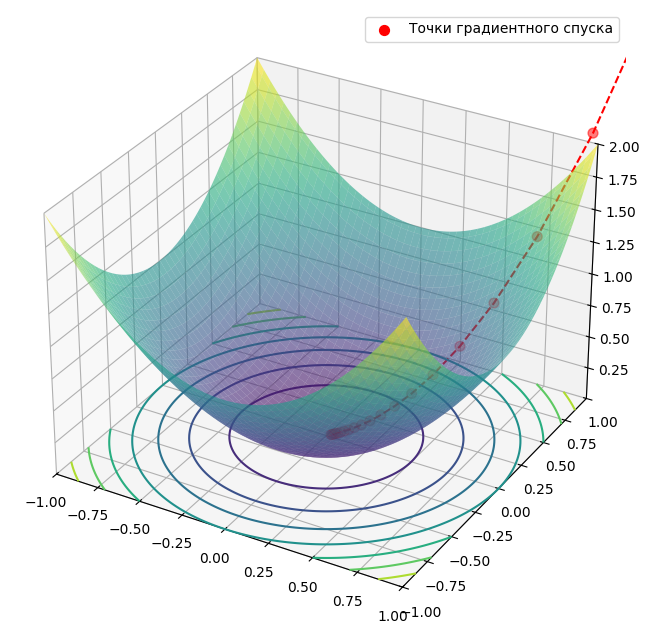

In [143]:
trace = grad_descent_2(grad_for_2, 0.1, 20)
plot_grad_2(func_1, trace=trace)

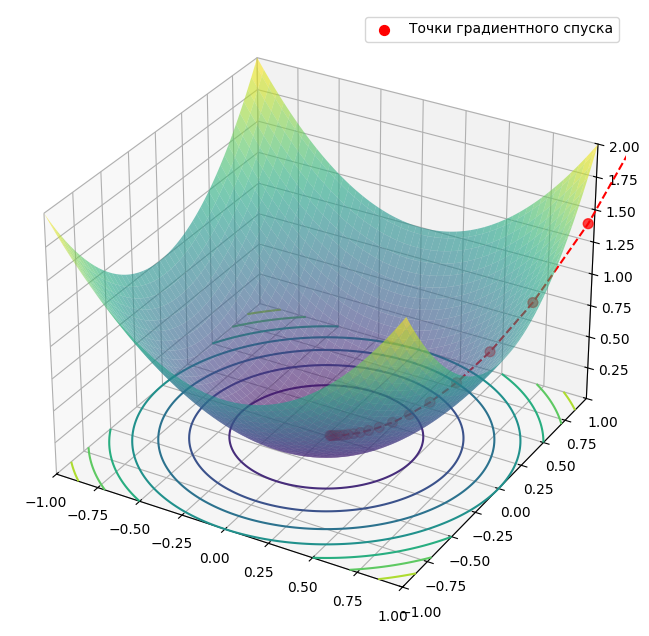

In [144]:
trace = grad_descent_2(grad_for_2, 0.1, 20)
plot_grad_2(func_2, trace=trace)

# Градиентный спуск c momentum

Это усовершенствованный вариант градиентного спуска, который носит название «градиентный спуск с momentum». Это не единственный вид градиентного спуска, но один из самых известных.

Для ускорения спуска было бы неплохо учитывать изменения на предыдущем шаге. На примере ниже мы видим, как алгоритм колеблется в разные стороны вокруг одной прямой. Было бы здорово явно указать алгоритму держаться ближе к прямой (которую можно представить, если соединить точки A и Local Optima) и двигаться вдоль неё.

<img src='Images/ml_11.png'>

Решить эту проблему как и позволяет градиентный спуск с momentum.

Для прошлого примера это работает так: точка начинает двигаться вдоль прямой, ведущей к локальному минимуму.

<img src='Images/ml_12.png'>

Это помогает ускорить сходимость алгоритма. В целом, это лишь одна из вариаций алгоритма градиентного спуска, и мы можем использовать её для увеличения качества. Ограничения тут ровно такие же, как и у обычного градиентного спуска. Нельзя утверждать, что этот метод всегда лучше других в тех или иных ситуациях — это просто ещё один инструмент, которым можно пользоваться при решении задач.

In [145]:
# Градиентный спуск с моментумом
def grad_descent_momentum(grad, step_size=0.2, num_steps=30, momentum=0.9):
    """
    Выполняет градиентный спуск с моментумом.

    Аргументы:
    grad - функция, вычисляющая градиент
    step_size - размер шага в направлении антиградиента
    num_steps - количество итераций
    momentum - коэффициент моментума (обычно от 0.5 до 0.99)

    Возвращает:
    lst - массив точек (x, y), через которые проходит градиентный спуск.
    """
    lst = []
    x = np.random.uniform(0, 3, size=2)  # Случайная начальная точка
    lst.append(x)
    
    velocity = np.zeros(2)  # Инициализация скорости (накопленный градиент)

    for i in range(num_steps):
        g = grad(lst[-1][0], lst[-1][1])  # Вычисляем градиент
        velocity = momentum * velocity - step_size * g  # Обновляем скорость
        x = x + velocity  # Делаем шаг с учётом моментума
        lst.append(x)
    
    return np.array(lst)

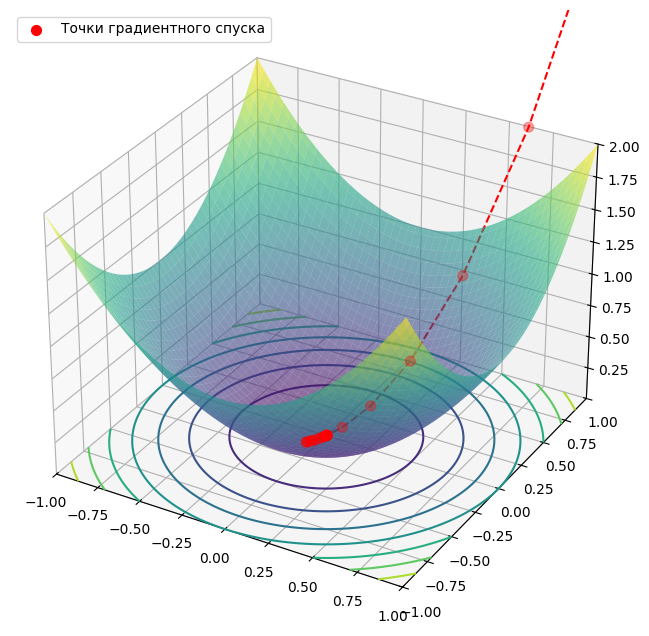

In [ ]:
# Запуск градиентного спуска с моментумом
trace = grad_descent_momentum(grad_for_2, step_size=0.05, num_steps=30, momentum=0.6)

# Визуализация траектории градиентного спуска
plot_grad_2(func_1, trace)

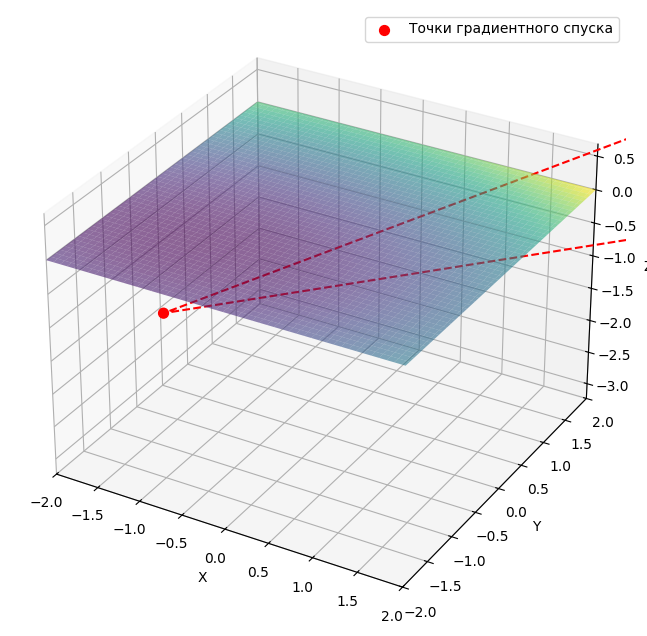

In [148]:
trace = grad_descent_3(grad_for_3, 0.25, 30)
plot_grad_3(func_3, trace=trace)

In [149]:
x, y, z = symbols('x y z')
f = 2 * x**2 - 4 * x * z + 4 * y**2 - 8 * y * z + 9 * z**2 + 4 * x + 8 * y - 20 * z

# Вычисляем частные производные
grad_x = diff(f, x)
grad_y = diff(f, y)
grad_z = diff(f, z)

point = {x: 0, y: 0, z: 0}
grad_at_point = (grad_x.subs(point), grad_y.subs(point), grad_z.subs(point))

alpha = 0.25

x_new = 0 - alpha * grad_at_point[0]
y_new = 0 - alpha * grad_at_point[1]
z_new = 0 - alpha * grad_at_point[2]

print(f"Следующая точка градиентного спуска: x = {x_new}, y = {y_new}, z = {z_new}")

Следующая точка градиентного спуска: x = -1.00000000000000, y = -2.00000000000000, z = 5.00000000000000
